In [27]:
from EM import *
T=100
r=np.load("./data/r.npy")
VIScalerfile="./tmppth/VIScaler_test1_888.pth"
EM_model=EM(T, -2, 0.2, 6.0, 2, 0.4, 0.1, 0., 2.5,rfilename="./data/r.npy",scalerfile=VIScalerfile)
EM_model=torch.load("./EM_model.pt")
params=(EM_model.alpha_r.item(), EM_model.beta_r.item(), EM_model.d.item(), EM_model.alpha_u.item(), EM_model.beta_u.item(), EM_model.gamma.item(), EM_model.theta.item(), EM_model._lambda.item())

In [39]:
N=100000
#alpha_r, beta_r, d, alpha_u, beta_u, self.gamma, theta, self._lambda
sampler=TEST_SAMPLER(T,params,path=VIScalerfile)
samples,weights=sampler.sample(N,r,exp_scale=0.5)
print(sampler.ESS_list)
#print(r.shape,samples.shape,weights.shape)
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
samples=samples[index]
timelist=[t for t in range(1,T+1)]
r_truth=np.load("./data/r_truth.npy")[:T]
eps_truth=np.load("./data/eps_truth.npy")[:T]
eps_mean=samples.mean(axis=0)
eps_std=np.std(samples,axis=0)
scale=1.96


[99497.53704638343, 98343.12679809362, 96807.35701022708, 96672.55615004689, 96434.49672182045, 96246.88284525112, 96001.4189626857, 95561.27162372663, 94443.08140871362, 94354.86179981263, 94138.09086927376, 94121.63952977759, 94077.9553891347, 93965.8892856609, 93011.25393437957, 92586.49302207238, 92482.73829660843, 92046.51837960278, 91876.3839844394, 91842.70940989417, 91593.27123041028, 91407.37216445975, 91243.44004486148, 91114.78950117464, 90887.79500685322, 90299.45764373828, 90128.3557923577, 89882.85138643475, 89908.83312725987, 89795.50103958443, 89374.35687912046, 89338.89126803346, 89240.05992425134, 89191.70835598832, 87061.46736179617, 86577.72947799948, 86414.64261800167, 86225.20705882857, 86158.3285679656, 85950.36270552718, 85885.18404117893, 85729.06163136775, 85517.268940389, 85470.60497951352, 85421.07686759409, 85359.16284390521, 85301.34675011583, 85259.74860233522, 84986.1283139782, 85012.51607801676, 84303.92903283155, 84235.16035299253, 84201.81642646615, 8

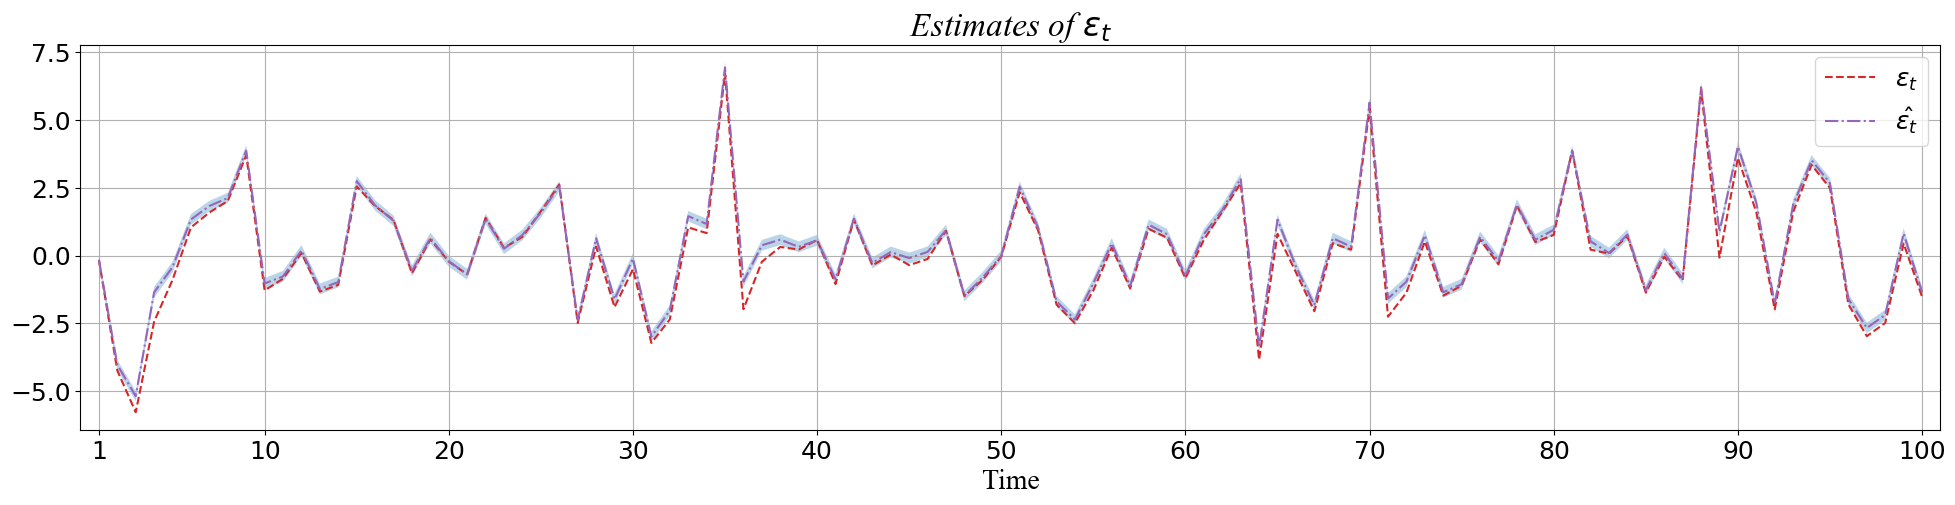

In [61]:
font1={'family' : 'Times New Roman', 'size': 24,"fontstyle":"oblique"}
font2={'family' : 'Times New Roman', 'size': 20}
plt.figure(figsize=(24,5))
T_low=0
T_upper=100
#plt.plot(timelist[T_low:T_upper],r_truth[T_low:T_upper],label="$r_t$",ls='-',c="C1")
plt.plot(timelist[T_low:T_upper],eps_truth[T_low:T_upper],label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[T_low:T_upper],eps_mean[T_low:T_upper],label=r"$\hat{\epsilon_t}$",ls='-.',c="C4")
plt.fill_between(timelist[T_low:T_upper],eps_mean[T_low:T_upper]-scale*eps_std[T_low:T_upper],eps_mean[T_low:T_upper]+scale*eps_std[T_low:T_upper],alpha=0.3)
plt.grid()
x_ticks=[1,10,20,30,40,50,60,70,80,90,100]
plt.xlim(T_low,T_upper+1)
plt.xticks(x_ticks)
plt.rcParams.update({'font.size':18})
plt.legend()
plt.xlabel("Time",fontdict=font2)
plt.title("Estimates of "+r"$\epsilon_t$",fontdict=font1)
plt.savefig("./report_figs/eps_1.pdf")


In [56]:
T_start=95
T_end=105
#params=(0.2, 0.2, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
alpha_r, beta_r, d, alpha_u, beta_u,gamma, theta, _lambda = params
n=100
T=100
r_predict=np.zeros((T+5,n)) #r yield
r_predict[:T]=r
eps_list=np.zeros((T+5,n))
eps_list[:T]=eps_mean.reshape(-1,1)
u_list=np.ones((T+5,n))
eps=np.ones(n)*eps_mean[-1]
u=eps**2/6

for i in range(T,T_end):
    u = alpha_u+beta_u*u+gamma*(eps**2)+theta*np.where(eps<0,eps**2,0)+norm.rvs(scale=0.5,size=n)
    u=np.where(u>0,u,0)
    print("min u",u.min())
    eps=np.random.standard_t(df=d, size=n)*np.sqrt(u)
    u_list[i]=u
    eps_list[i]=eps
    r_predict[i]=alpha_r+beta_r*u+eps
r_predict=r_predict.T

min u 0.6871534448410288
min u 0.8576414636454905
min u 0.8906768542564162
min u 0.6441002121869226
min u 0.8626845547048894


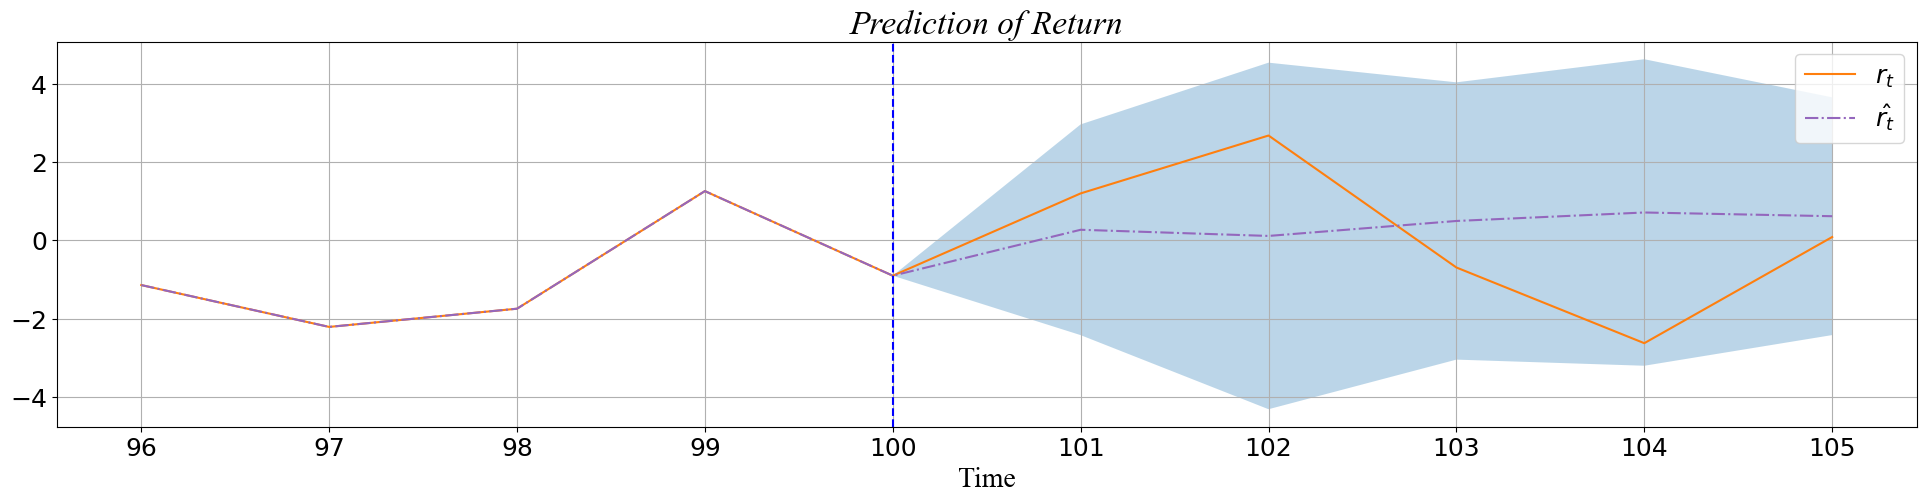

In [62]:

r_truth=np.load("./data/r_truth.npy")
eps_truth=np.load("./data/eps_truth.npy")
timelist=[t for t in range(1,T_end+1)]
r_mean=r_predict.mean(axis=0)
r_std=np.std(r_predict,axis=0)
scale=1.96
plt.figure(figsize=(24,5))
plt.plot(timelist[T_start:T_end],r_truth[T_start:T_end],label="$r_t$",ls='-',c="C1")
# plt.plot(timelist,eps_truth,label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[T_start:T_end],r_mean[T_start:T_end],label=r"$\hat{r_t}$",ls='-.',c="C4")
plt.fill_between(timelist[T_start:T_end],r_mean[T_start:T_end]-scale*r_std[T_start:T_end],r_mean[T_start:T_end]+scale*r_std[T_start:T_end],alpha=0.3)
plt.axvline(x=T,ls="--",c="blue")
plt.grid()
x_ticks=[96,97,98,99,100,101,102,103,104,105]
plt.xticks(x_ticks)
plt.xlabel("Time",fontdict=font2)
plt.legend()
plt.title("Prediction of Return",fontdict=font1)
plt.savefig("./report_figs/prediction_1.pdf")

## Test for S&P500

In [76]:
T=100
r=np.load("./data/spnew.npy")
VIScalerfile="./tmppth/VIScaler_test1_888.pth"
EM_model=EM(T, -2, 0.2, 6.0, 2, 0.4, 0.1, 0., 2.5,rfilename="./data/spnew.npy",scalerfile=VIScalerfile)
EM_model=torch.load("./EM_model_sp.pt")
params=(EM_model.alpha_r.item(), EM_model.beta_r.item(), EM_model.d.item(), EM_model.alpha_u.item(), EM_model.beta_u.item(), EM_model.gamma.item(), EM_model.theta.item(), EM_model._lambda.item())

In [95]:
sp=np.load("./sp500adjusted.npy")
sp_truth=sp*2
r_truth=sp_truth

In [96]:
N=100000
#alpha_r, beta_r, d, alpha_u, beta_u, self.gamma, theta, self._lambda
sampler=TEST_SAMPLER(T,params,path=VIScalerfile)
samples,weights=sampler.sample(N,r,exp_scale=0.5)
#sampler.plot_ESS()
#print(r.shape,samples.shape,weights.shape)
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
samples=samples[index]
timelist=[t for t in range(1,T+1)]
eps_mean=samples.mean(axis=0)
eps_std=np.std(samples,axis=0)
scale=1.96


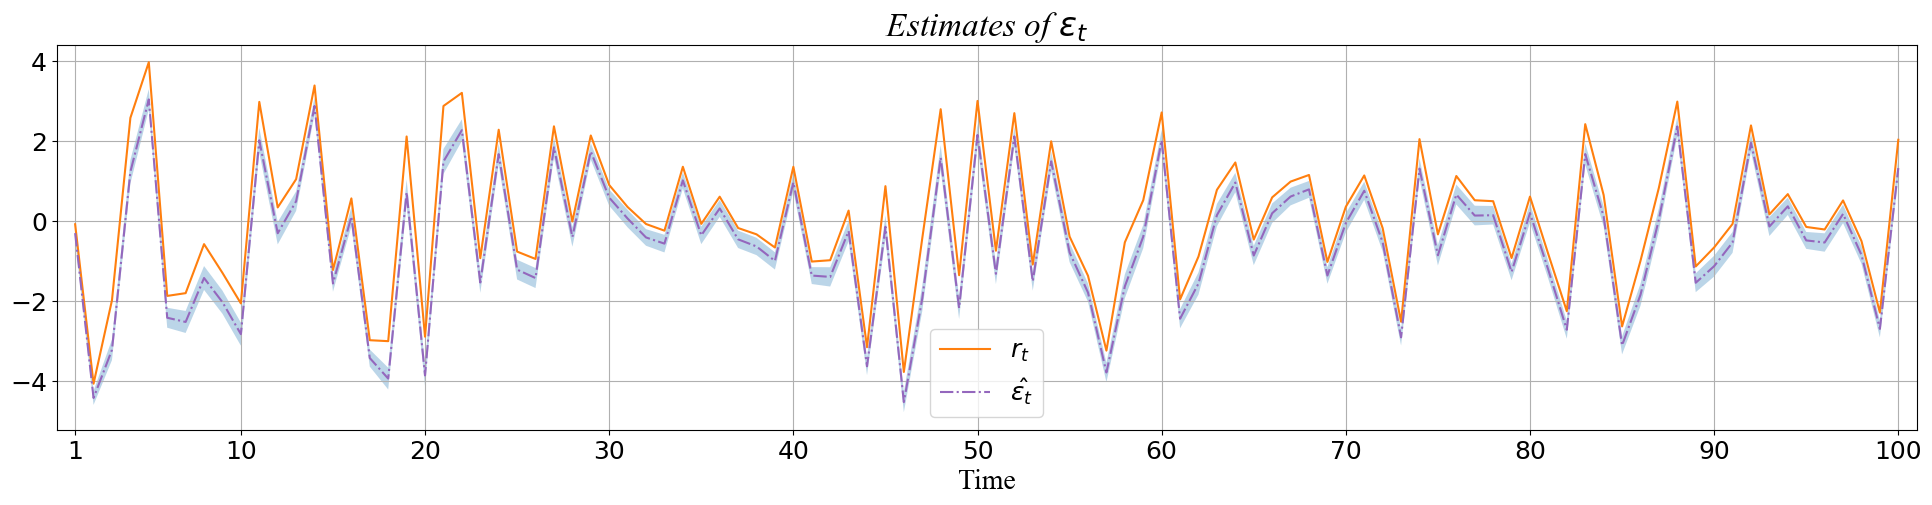

In [97]:
font1={'family' : 'Times New Roman', 'size': 24,"fontstyle":"oblique"}
font2={'family' : 'Times New Roman', 'size': 20}
plt.figure(figsize=(24,5))
T_low=0
T_upper=100
plt.plot(timelist[T_low:T_upper],r_truth[T_low:T_upper],label="$r_t$",ls='-',c="C1")
#plt.plot(timelist[T_low:T_upper],eps_truth[T_low:T_upper],label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[T_low:T_upper],eps_mean[T_low:T_upper],label=r"$\hat{\epsilon_t}$",ls='-.',c="C4")
plt.fill_between(timelist[T_low:T_upper],eps_mean[T_low:T_upper]-scale*eps_std[T_low:T_upper],eps_mean[T_low:T_upper]+scale*eps_std[T_low:T_upper],alpha=0.3)
plt.grid()
x_ticks=[1,10,20,30,40,50,60,70,80,90,100]
plt.xlim(T_low,T_upper+1)
plt.xticks(x_ticks)
plt.rcParams.update({'font.size':18})
plt.legend()
plt.xlabel("Time",fontdict=font2)
plt.title("Estimates of "+r"$\epsilon_t$",fontdict=font1)
plt.savefig("./report_figs/eps_sp.pdf")


In [124]:
T_start=95
T_end=105
#params=(0.2, 0.2, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
alpha_r, beta_r, d, alpha_u, beta_u,gamma, theta, _lambda = params
n=100
T=100
r_predict=np.zeros((T+5,n)) #r yield
r_predict[:T,:]=np.einsum("i,j->ij",sp_truth[:T],np.ones(n))


In [129]:
eps_list=np.zeros((T+5,n))
eps_list[:T]=eps_mean.reshape(-1,1)
u_list=np.ones((T+5,n))
eps=np.ones(n)*eps_mean[-1]
u=eps**2

for i in range(T,T_end):
    u = alpha_u+beta_u*u+gamma*(eps**2)+theta*np.where(eps<0,eps**2,0)+norm.rvs(scale=0.5,size=n)
    u=np.where(u>0,u,0)
    eps=np.random.standard_t(df=d, size=n)*np.sqrt(u)
    u_list[i]=u
    eps_list[i]=eps
    r_predict[i]=alpha_r+beta_r*u+eps
r_predict=r_predict.T

IndexError: index 100 is out of bounds for axis 0 with size 100

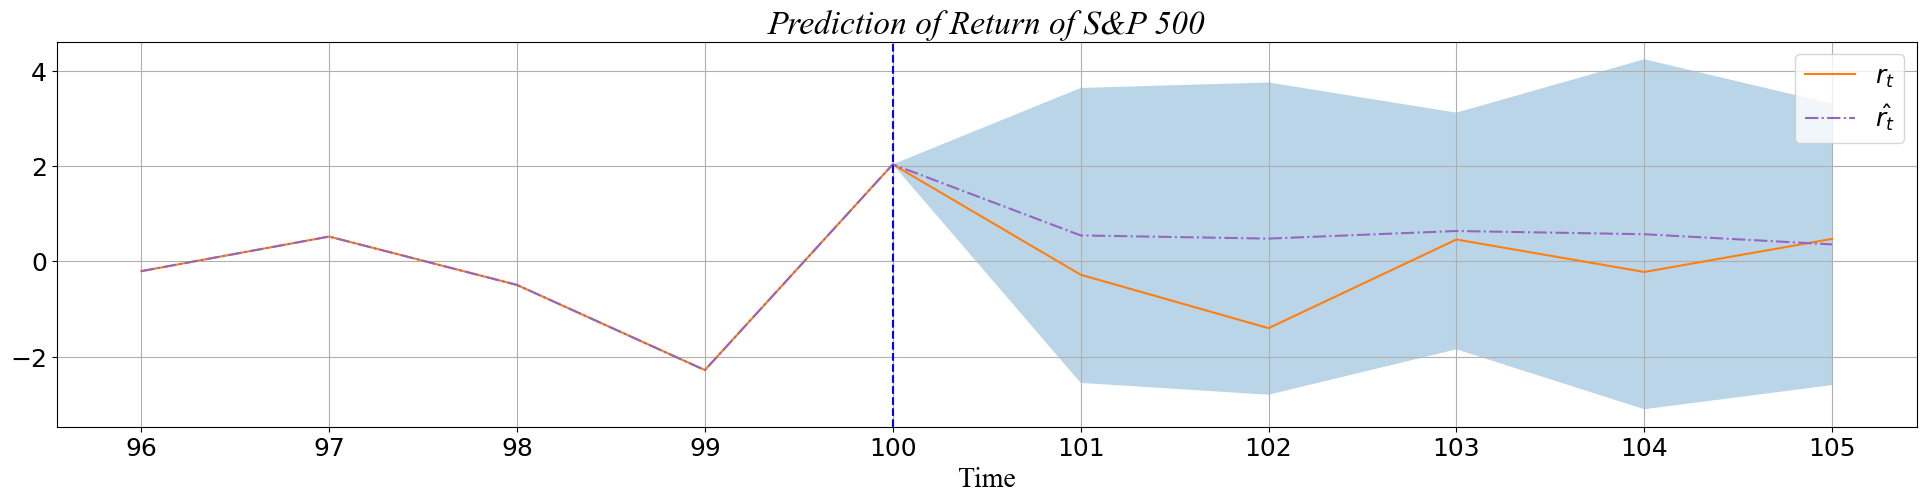

In [131]:


timelist=[t for t in range(1,T_end+1)]
r_mean=r_predict.mean(axis=0)
r_std=np.std(r_predict,axis=0)
scale=1.96
plt.figure(figsize=(24,5))
plt.plot(timelist[T_start:T_end],r_truth[T_start:T_end],label="$r_t$",ls='-',c="C1")
# plt.plot(timelist,eps_truth,label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[T_start:T_end],r_mean[T_start:T_end],label=r"$\hat{r_t}$",ls='-.',c="C4")
plt.fill_between(timelist[T_start:T_end],r_mean[T_start:T_end]-scale*r_std[T_start:T_end],r_mean[T_start:T_end]+scale*r_std[T_start:T_end],alpha=0.3)
plt.axvline(x=T,ls="--",c="blue")
plt.grid()
x_ticks=[96,97,98,99,100,101,102,103,104,105]
plt.xticks(x_ticks)
plt.xlabel("Time",fontdict=font2)
plt.legend()
plt.title("Prediction of Return of S&P 500",fontdict=font1)
plt.savefig("./report_figs/prediction_sp.pdf")